In [1]:
import os
import numpy as np
import gym
import tensorflow as tf
from time import time
from GA.genetic_algorithm import GeneticNetworks

from utils.atari_environment import AtariEnvironment
from utils.continuous_environments import Environment

from keras.backend.tensorflow_backend import set_session
from utils.networks import get_session

Using TensorFlow backend.


In [2]:
gym.logger.set_level(40)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
tensorboard_logs = "GA/tensorboard_gym"

In [4]:
!mkdir GA/tensorboard_gym
!mkdir saved_models

In [5]:
# Clear any logs from previous runs
import shutil
shutil.rmtree(tensorboard_logs)

In [6]:
set_session(get_session())
summary_writer = tf.summary.FileWriter(tensorboard_logs)

In [7]:
env_name = 'Acrobot-v1'

args = {
    'gym_env': gym.make(env_name),
    'action_repeat': 4
}
env = Environment(**args)
print('observation_space ', env.get_state_size())
print('action_space ', gym.make(env_name).action_space)

action_dim = gym.make(env_name).action_space.n
space_dim = env.get_state_size()[0]

print(action_dim, space_dim, env_name)

observation_space  (6,)
action_space  Discrete(3)
3 6 Acrobot-v1


In [9]:
genetic_pop = GeneticNetworks(architecture=(space_dim * args['action_repeat'],16,action_dim),
                                population_size=64, 
                                generations=200,
                                episodes=15, 
                                mutation_variance=0.1,
                                render_env=False,
                                verbose=True)

--------------------------------------------------
Logging params: 
population_size 64
generations 200
mutation_variance 0.1
survival_ratio 0.1
both_parent_percentage 0.8
one_parent_percentage 0.1
episodes 15
--------------------------------------------------


## Train

In [10]:
%%time
genetic_pop.fit(env, summary_writer, num_cpus=4, env_args=args)

Generation:   0%|          | 0/200 [00:00<?, ? gen/s]

Generation:10| Highest Reward:-78.33333333333333| Average Reward:-90.37916666666666| std Reward: 9.091570233219098| Stagnation: 11| Population size: 64:   5%|▌         | 10/200 [03:38<48:22, 15.28s/ gen]  

CPU times: user 847 ms, sys: 405 ms, total: 1.25 s
Wall time: 3min 38s


[{'max': -85.13333333333334,
  'mean': -431.37395833333335,
  'std': 130.73999091559313},
 {'max': -96.06666666666666,
  'mean': -355.6177083333333,
  'std': 156.6647292620399},
 {'max': -82.53333333333333,
  'mean': -431.52083333333337,
  'std': 141.69451288825155},
 {'max': -84.33333333333333,
  'mean': -390.0864583333333,
  'std': 150.21309570799352},
 {'max': -106.8, 'mean': -425.1645833333333, 'std': 134.22817066925734},
 {'max': -82.6, 'mean': -216.8875, 'std': 155.31468185366623},
 {'max': -85.8, 'mean': -408.703125, 'std': 150.4872004199506},
 {'max': -75.2, 'mean': -111.39791666666667, 'std': 39.63793246505381},
 {'max': -80.46666666666667,
  'mean': -161.07083333333333,
  'std': 113.65295669700909},
 {'max': -78.33333333333333,
  'mean': -90.37916666666666,
  'std': 9.091570233219098}]

          max        mean         std
0  -85.133333 -431.373958  130.739991
1  -96.066667 -355.617708  156.664729
2  -82.533333 -431.520833  141.694513
3  -84.333333 -390.086458  150.213096
4 -106.800000 -425.164583  134.228171
5  -82.600000 -216.887500  155.314682
6  -85.800000 -408.703125  150.487200
7  -75.200000 -111.397917   39.637932
8  -80.466667 -161.070833  113.652957
9  -78.333333  -90.379167    9.091570


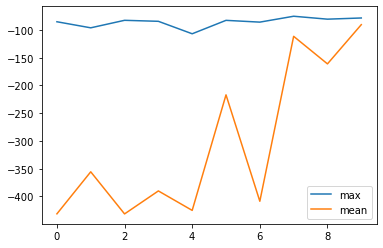

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(genetic_pop.global_info)
print(df)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(df['max'], label='max')
plt.plot(df['mean'], label='mean')
plt.legend()
plt.show()

## Evaluate

In [16]:
# Lets observe our best network
genetic_pop.best_network.evaluate(env, episodes=3, render_env=False, record=False)

-100.33333333333333